# 有限马尔科夫决策过程

## 一.分幕式任务与持续性任务
首先.我们应该知道智能体的目标就是尝试选择动作,使得能最大限度的提高长期收益.对于任务,我们可以将其分为两类:<p>
    (1).分幕式任务:如一盘棋局,迷宫游戏等,上一幕的结束状态与下一幕的起始状态无关."幕"也可以成为"实验",我们寻求的是最大化期望回报.<p>
       $G_{t} = R_{t+1} + R_{t+2} + ... + R_T$<p>
    (2).持续性任务:连续的过程控制任务,这里在计算长期收益时,会引入折扣因子$\gamma$的概念.<p>
        $G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + .... \\ \quad = R_{t+1} + \gamma G_{t+1}$<p>
        虽然是对无限个收益子项求和,但只要收益是非零常数,并且$\gamma < 1$,整体回报仍是有限的.<p>
## 二.二者的统一表达形式
      对于分幕式任务,可以把幕的终止当做一个特殊的"吸收状态"的入口,回报可以统一表示为:

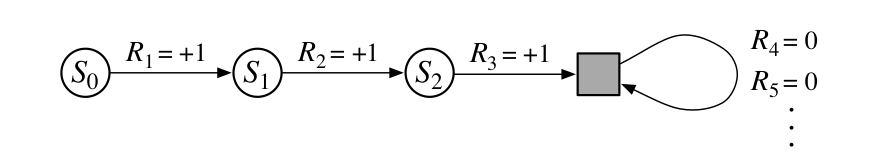

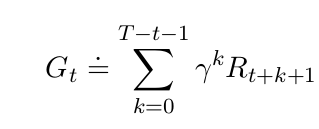

## 三.策略和价值函数

(1). 价值函数分为: 状态价值函数$v_{\pi}(s)$和动作价值函数$q_{\pi}(s,a)$,用来评估当前智能体在给定状态(或给定状态动作下)有多好,即回报的期望值.<p>

    

(2). 策略:价值函数是与特定的行为方式相关的,称之为策略.策略是从状态到每个动作的选择概率之间的映射.<p>
    $v_{\pi}(s)$表示策略$\pi$下状态s的价值函数:<p>
    $v_{\pi}(s) = E_{\pi}[G_t | S_t = s] = E_{\pi}[ \sum_{k = 0}^{\infty} \gamma^kR_{t+k+1} | S_t = s ]$ <p>
    $q_{\pi}(s,a)$表示状态s开始,执行动作a,所有可能的决策序列的期望回报:<p>
    $q_{\pi}(s,a) = E_{\pi}[G_t | S_t = s, A_t = a] = E_{\pi}[ \sum_{k = 0}^{\infty} \gamma^kR_{t+k+1} | S_t = s,A_t = a]$ <p>

(3).$E[R_{t+1} | S_t = s]$怎么求?<p>
    先求采取s下某个动作a时回报的期望,再对该策略下所有可能的动作求和,即得s下回报的期望.<p>
    $E[R_{t+1} | S_t = s] = \sum_a \pi(a|s) \sum_{s',r} r p(s',r | s,a)$

(4).对于价值函数,它满足某种递归关系,对任何的策略$\pi$和任何状态s,s的价值与其可能的后继状态价值$v_{\pi}(s')$之间存在以下的关系:<p>
    $v_{\pi}(s) = E_{\pi}[G_t | S_t = s] \\ = E_{\pi}[ R_{t+1} + \gamma G_{t+1} | S_t = s ] \\
     = E_{\pi}[ R_{t+1} | S_t = s ] + \gamma E_{\pi}[ G_{t+1} | S_t = s ]$    

从(3)可知 $E[R_{t+1} | S_t = s] = \sum_a \pi(a|s) \sum_{s',r} r p(s',r | s,a)$

对于第二项可以表示为:$\gamma E_{\pi}[ G_{t+1} | S_t = s ] = \gamma \sum_a \pi(a|s) \sum_{s',r} v_{\pi}(s') p(s',r | s,a)$ <p>
  不难理解,状态 s 下 $G_{t+1}$ 的期望为各个可能的状态 s' 下对应的 $v_{\pi}(s') = E_{\pi}[G_{t+1} | S_t = s']$ 的期望.

(5).由(4)我们就得到了$v_{\pi}$的贝尔曼方程:

$v_{\pi}(s) = \sum_a \pi(a|s) \sum_{s', r} p(s',r | s,a) [r + \gamma v_{\pi}(s')]$

其表达了状态价值和后继状态价值的关系.价值函数$v_{\pi}$是贝尔曼方程的唯一解.